# Adaboost

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm

###### 编程实现AdaBoost算法对波士顿房价数据集进行回归，需画折线图比较每个弱学习器的错误率与权重的变化关系，并列表对比其中的弱学习器(又称基学习器)和AdaBoost回归的性能。

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

data = load_boston()
X = data['data']
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

C:\Users\ASUS\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [48]:
from sklearn.ensemble import AdaBoostRegressor

session = AdaBoostRegressor(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=None)

session.fit(X_train,y_train)
pred_y = session.predict(X_test)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred_y)
print ("AdaBoost MSE = ", mse)

AdaBoost MSE =  13.321207907118788


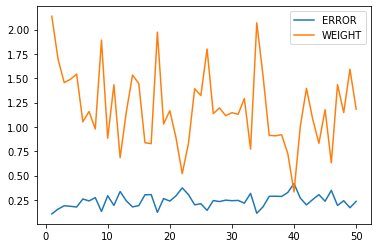

In [49]:
errorlist=session.estimator_errors_
weightlist=session.estimator_weights_
plt.plot(range(1,len(weightlist)+1), errorlist,label = "ERROR")
plt.plot(range(1,len(weightlist)+1), weightlist,label = "WEIGHT")
plt.legend()
plt.show()

#### 可见错误率越高，权重越小，两者负相关

#### 弱学习器相当于只含一个弱学习器的Adaboost模型（退化为弱学习器）

In [50]:
sess_weak = AdaBoostRegressor(
    base_estimator=None,
    n_estimators=1,
    learning_rate=1.0,
    loss='linear',
    random_state=None)

sess_weak.fit(X_train,y_train)
pred_y_weak = sess_weak.predict(X_test)
mse_weak = mean_squared_error(y_test, pred_y_weak)
print ("AdaBoost MSE ={} \nWeak Estimator MSE={}".format(mse,mse_weak))

AdaBoost MSE =13.321207907118788 
Weak Estimator MSE=24.974980167958506
